<a href="https://colab.research.google.com/github/Sambhaji6529/Assessment_ML/blob/main/Assessment_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

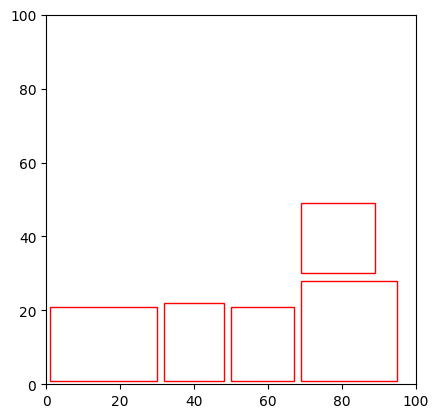

In [2]:
import random
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Define the rectangle class
class Rectangle:
    def __init__(self, width, height):
        self.width = width
        self.height = height
        self.x = None
        self.y = None
        self.rotated = False

    def rotate(self):
        self.width, self.height = self.height, self.width
        self.rotated = not self.rotated

# Recursive partitioning function
def place_rectangle(rect, space):
    x, y, w, h = space

    # Check if the rectangle fits in the current space with 1-unit separation
    if rect.width + 1 <= w and rect.height + 1 <= h:
        rect.x, rect.y = x + 1, y + 1  # Account for the separation
        return True
    elif rect.height + 1 <= w and rect.width + 1 <= h:
        rect.rotate()
        rect.x, rect.y = x + 1, y + 1  # Account for the separation
        return True
    else:
        return False

def divide_and_conquer(ax, rectangles, space):
    if not rectangles:
        return True

    rect = rectangles[0]
    x, y, w, h = space

    # Try placing the current rectangle
    if place_rectangle(rect, space):
        # Draw the rectangle
        rect_patch = patches.Rectangle((rect.x, rect.y), rect.width, rect.height, linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect_patch)

        # Remaining space after placing the rectangle
        remaining_rectangles = rectangles[1:]

        # Divide the space into two parts:
        # 1. To the right of the placed rectangle
        if divide_and_conquer(ax, remaining_rectangles, (x + rect.width + 2, y, w - rect.width - 2, h)):
            return True

        # 2. Below the placed rectangle
        if divide_and_conquer(ax, remaining_rectangles, (x, y + rect.height + 2, w, h - rect.height - 2)):
            return True

        return False
    else:
        return False

# Set up the canvas
fig, ax = plt.subplots()
ax.set_xlim(0, 100)
ax.set_ylim(0, 100)

# Generate random rectangles
rectangles = [Rectangle(random.randint(10, 30), random.randint(10, 30)) for _ in range(5)]

# Start recursive partitioning
if not divide_and_conquer(ax, rectangles, (0, 0, 100, 100)):
    raise ValueError("Placement not possible")

# Display the result
plt.gca().set_aspect('equal', adjustable='box')
plt.show()
